## Step-1 Reading, understanding and visualizing Data

In [64]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Scilit Library
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


#Importing STATModel Library
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [65]:
# Ignoring Warnings
import warnings 
warnings.filterwarnings('ignore')

### 1.1 Data Sourcing

In [66]:
# Importing data from CSV file
df = pd.read_csv('D:\day.csv')

#Printing first five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [67]:
# checking the no.of rows and columns in dataframe
print(df.shape)

# describing the columns of dataframe
df.describe()

(730, 16)


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [68]:
#Checking column, its datatype and presences of NULL value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No NULL value has been found

### 1.2 Data Cleaning

In [69]:
# Checking for duplicate rows
df_copy = df
# dropping the duplicates in new dataframe
df_copy.drop_duplicates(inplace=True)
#Checking for difference
print(df.shape)
print(df_copy.shape)

(730, 16)
(730, 16)


No duplicate row presences, Since there is no difference in duplicate dropped dataframe and original dataframe

In [70]:
# renaming few columns for better readability
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','dteday':'date','weathersit':'weather','cnt':'count'}, inplace=True)

In [71]:
# dropping the unwanted columns

# instant has only index for the row,
# casual and registered seems to be the breakup by category for cnt column.
df.drop(['instant','casual','registered'],axis=1,inplace=True)

In [72]:
#checking the distribution of date, month and year in the date column
print('Checking Range of dates')
print(df['date'].apply(lambda x: int(x.split('-')[0])).describe(),end='\n\n')
print('Checking Range of month')
print(df['date'].apply(lambda x: int(x.split('-')[1])).describe(),end='\n\n')
print('Checking Range of year')
print(df['date'].apply(lambda x: int(x.split('-')[2])).describe(),end='\n\n')

Checking Range of dates
count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: date, dtype: float64

Checking Range of month
count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: date, dtype: float64

Checking Range of year
count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: date, dtype: float64



Conclusion: As date, month and year are in expected range. Since , other column is also consisting of month, year information. The date column is not much required for inference. Therefore, deciding it to drop.

In [73]:
# Dropping Date column
df.drop(['date'],axis=1,inplace=True)

In [74]:
# Encoding/mapping the season,month,weekday and weather
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weather = df.weather.map({1:'Clear',2:'Mist',3:'Lightsnowrain',4:'Heavysnowrain'})

# check the column info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


In [75]:
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


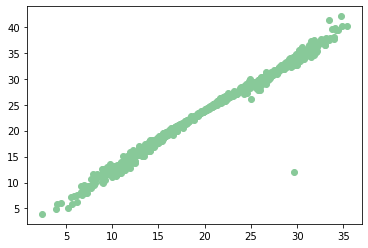

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


In [76]:
#Checking Correlation with temperature and adjusted temperature

#Visualizing the distribution
plt.scatter(df['temp'], df['atemp'], color = '#88c999')
plt.show()
#Correlation check
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(df['temp'], df["atemp"]), index=headers, columns=headers)

Dropping adjusted temperature. Since, there is high correlation between temperature and adjusted temperature.<br>Both will provide a same information

In [77]:
#Dropping Adjusted temperature
df.drop(['atemp'],axis=1,inplace=True)

#Confirming whether dropped or not
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


### 1.3 Data Visualization

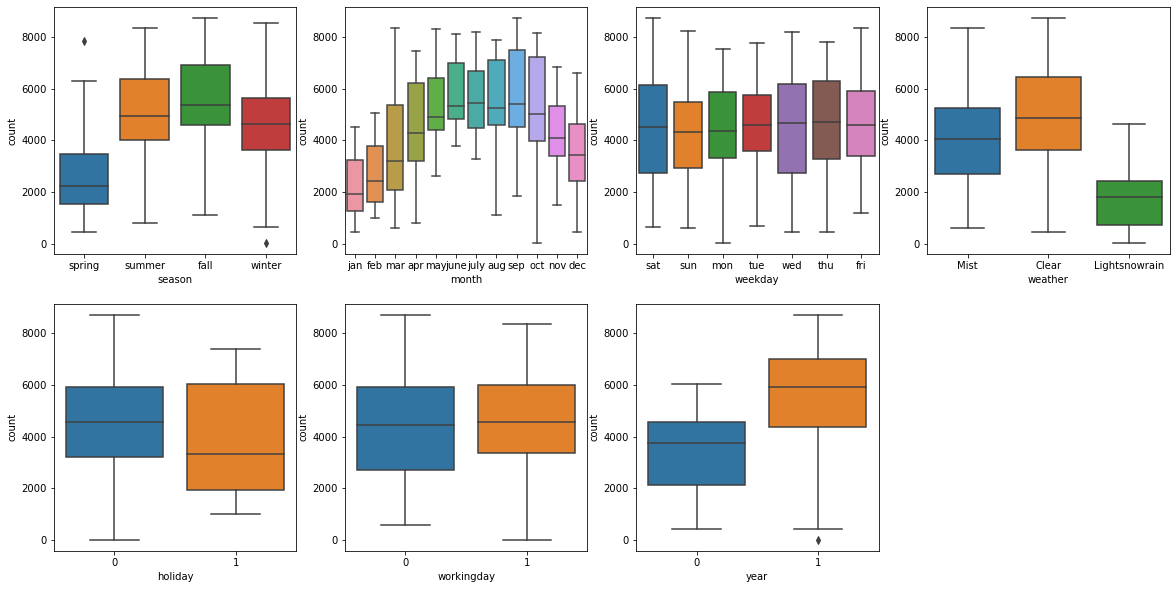

In [78]:
# 1.3.1 visualizing the categorical columns distribution

# Independent variable Vs target variable
plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weather', y = 'count', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'count', data = df)
plt.show()

Some Assumption:
<br>1)Season fall having highest distribution in booking count.
<br>2)The month Jan, Feb, Mar and Dec having low numner of booking.
<br>3)Wednesday and Saturday having high number of booking.
<br>4)Very less number of booking in liht snowrain and high booking in clear weather, As pratically its difficult to travel in bike during snow rain.
<br>5)The year 2019 having good number of increase in booking.

In [79]:
# 1.3.2 visualizing the categorical columns distribution Vs Count(target variable), with comparision of years

#Generalized function for making Bar plot between target variable Vs Independent categorical variable
#General distribution and Distribution based on year
def Barplots(column_name):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column_name,'count',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column_name,'count',data=df, hue='year',palette='mako_r')
    plt.legend(labels=['2018', '2019'])
    plt.show()

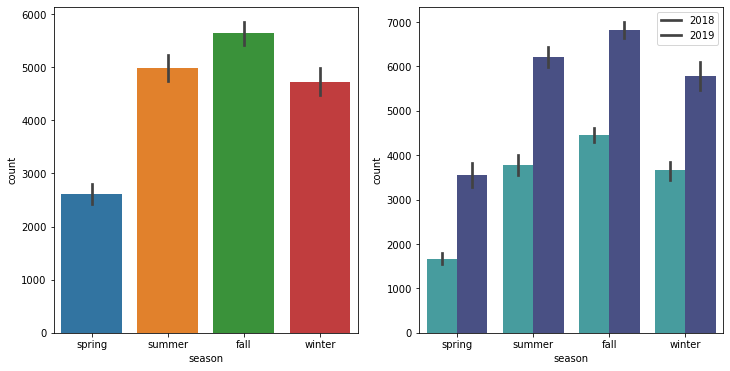

In [80]:
#Invoking barplots for the column season
Barplots('season')

Conclusion:
<br>1) Season Spring having less number of booking then summer, fall and winter. Season Fall having greater booking in all three.
<br>2) There was a drastic increase in booking count at a year 2019 compared to 2018 in all season

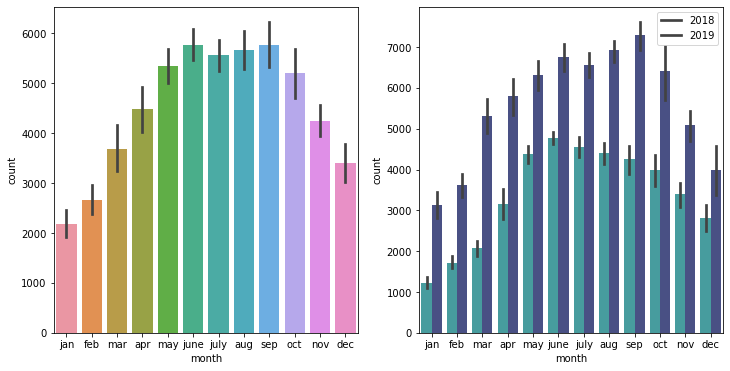

In [81]:
#Invoking barplots for the column month
Barplots('month')

Conclusion:
<br>1)From May to Oct ther is good number of bookig count
<br>2)Booking count increased from 2018 to 2019 in all months

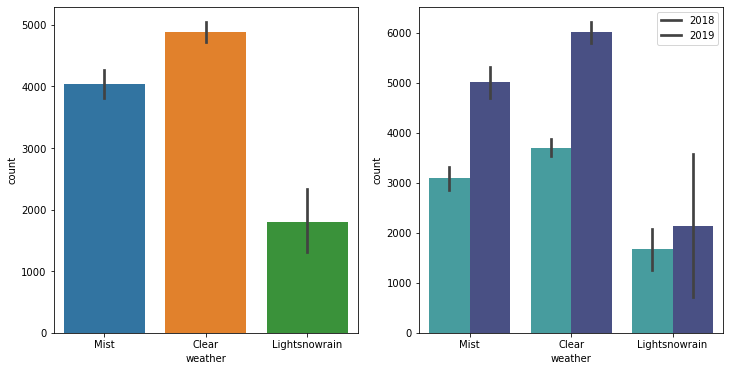

In [82]:
#Invoking barplots for the column weather
Barplots('weather')

Conclusion:
<br>1)Clear weather will increase number of booking than mist and light snow rain

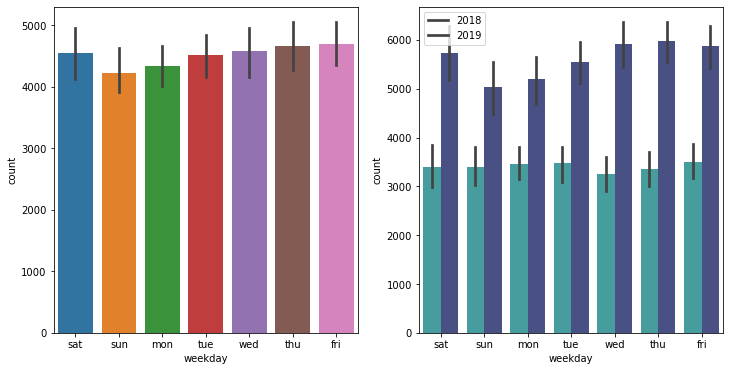

In [83]:
#Invoking barplots for the column weekday
Barplots('weekday')

Conclusion:
<br>1) All weekdays having moderately equal booking count with less difference.

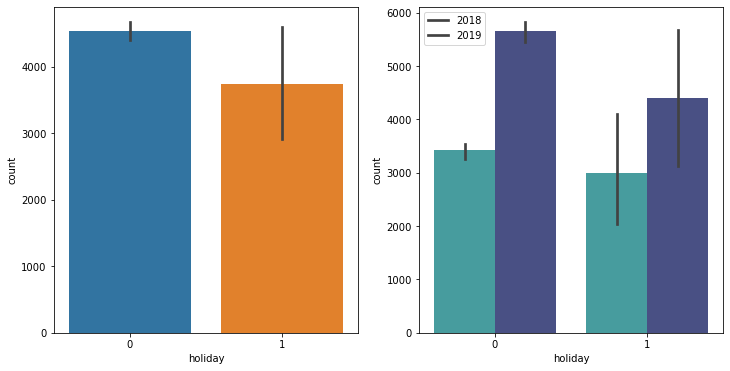

In [84]:
#Invoking barplots for the column holiday
Barplots('holiday')

NOTE : Holiday is a Categorical Nomimal Variable."Yes" or "No" is mapped to "1" & "0" respectively.
<br>Conclusion:
<br>1)Holiday having less number of booking as its a rest day for working professional, leave day for colleges/schools

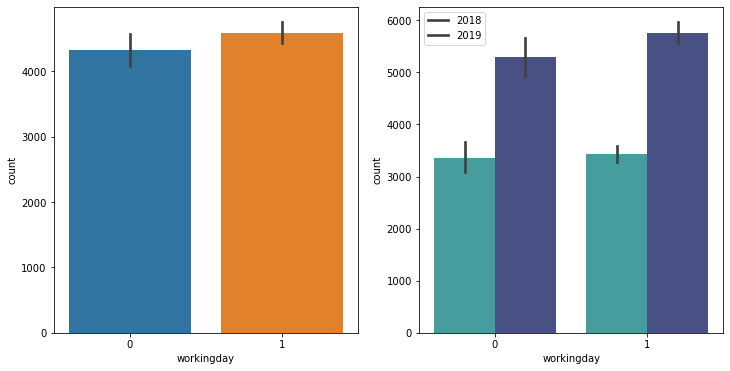

In [85]:
#Invoking barplots for the column workingday
Barplots('workingday')

NOTE : Working day is a Categorical Nomimal Variable."Yes" or "No" is mapped to "1" & "0" respectively.
<br>Conclusion:
<br>1)Working day having good number of booking as they travel to work places.

In [86]:
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


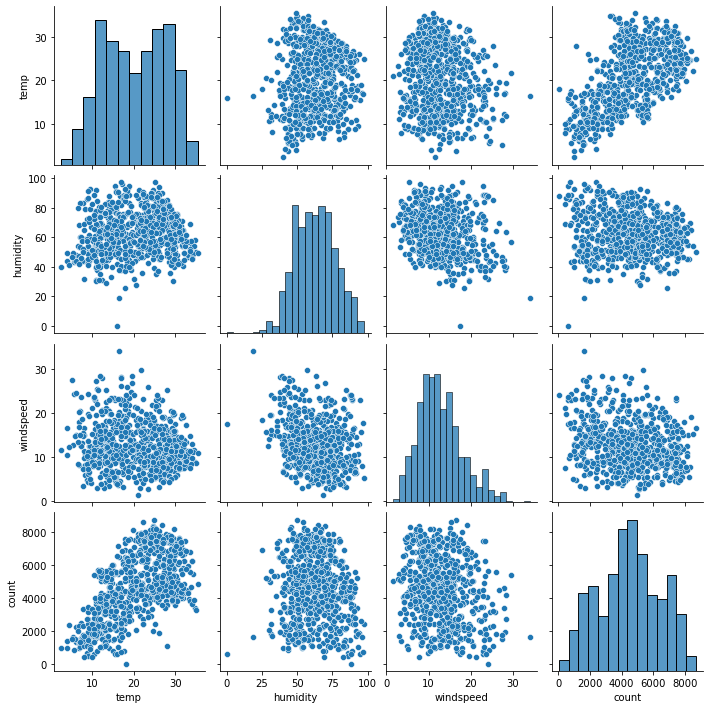

In [87]:
# 1.3.3 visualizing the numerical columns

sns.pairplot(data=df,vars=['temp','humidity','windspeed','count'])
plt.show()

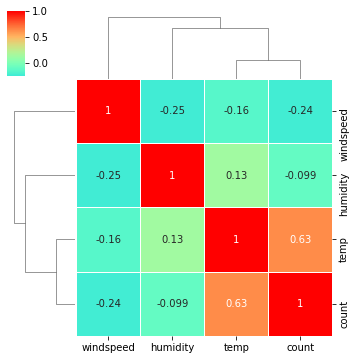

In [88]:
# 1.3.4 Visualizing the correlation in the form of heat map.

kwargs = {'annot': True}
sns.clustermap(df[['temp','humidity','windspeed','count']].corr(), center = 0, cmap = 'rainbow', linewidths = 0.75, figsize = (5, 5), **kwargs)
plt.savefig('plotheatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Conclusion:
<br>1)There is a negative correlation exist between windspeed and booking count with 24%.
<br>2)There is no much relationship between Booking count and humidity.
<br>3)The temperature and Booking count have positive correlation with 63%

## Step 2 : Data Preparation for modelling

### 2.1 One Hot Encoding to Encode categorical variable
The categorical variable need to be convereted into binary vector representation. Since, model could not take categorical variable to train.
<br> Using One code decoder method to convert, Since the highest categorical value column is month with 12 different categorical variable.

In [89]:
#Doing One hot encoding with the help of pandas get_dummies
months_df=pd.get_dummies(df.month,drop_first=True)
weekdays_df=pd.get_dummies(df.weekday,drop_first=True)
weather_df=pd.get_dummies(df.weather,drop_first=True)
seasons_df=pd.get_dummies(df.season,drop_first=True)

In [90]:
#Adding Encoded values to the dataframe
df = pd.concat([df,months_df,weekdays_df,weather_df,seasons_df],axis=1)
df.shape

(730, 33)

In [91]:
#Checking added columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   year           730 non-null    int64  
 2   month          730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weather        730 non-null    object 
 7   temp           730 non-null    float64
 8   humidity       730 non-null    float64
 9   windspeed      730 non-null    float64
 10  count          730 non-null    int64  
 11  aug            730 non-null    uint8  
 12  dec            730 non-null    uint8  
 13  feb            730 non-null    uint8  
 14  jan            730 non-null    uint8  
 15  july           730 non-null    uint8  
 16  june           730 non-null    uint8  
 17  mar            730 non-null    uint8  
 18  may       

In [92]:
# dropping categorical column in datafram.
df.drop(['season','month','weekday','weather'], axis = 1, inplace = True)
df.shape

(730, 29)

### 2.2 Splitting data into train and test set

In [93]:
#Taking 70% of data into train and 30% of data into test
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [94]:
#Checking the train and test dataset shape
print('Train set',df_train.shape)
print('Test set',df_test.shape)

Train set (510, 29)
Test set (220, 29)


### 2.3 Re-scaling required columns

In [95]:
#The variable temperature, humidity, windspeed and count are in different scale which make difficult for model to train

#Using MinMax scaler technique to scale this four columns
scaler = MinMaxScaler()

#Columns which gonna have MinMax scaling
range_variables = ['temp','humidity','windspeed','count']

#Since, its a train set. we have to fit and to transform
df_train[range_variables] = scaler.fit_transform(df_train[range_variables])

In [96]:
#Checking the dataframe scaling
df_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Lightsnowrain,Mist,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All column maximum value is 1, which is normalized

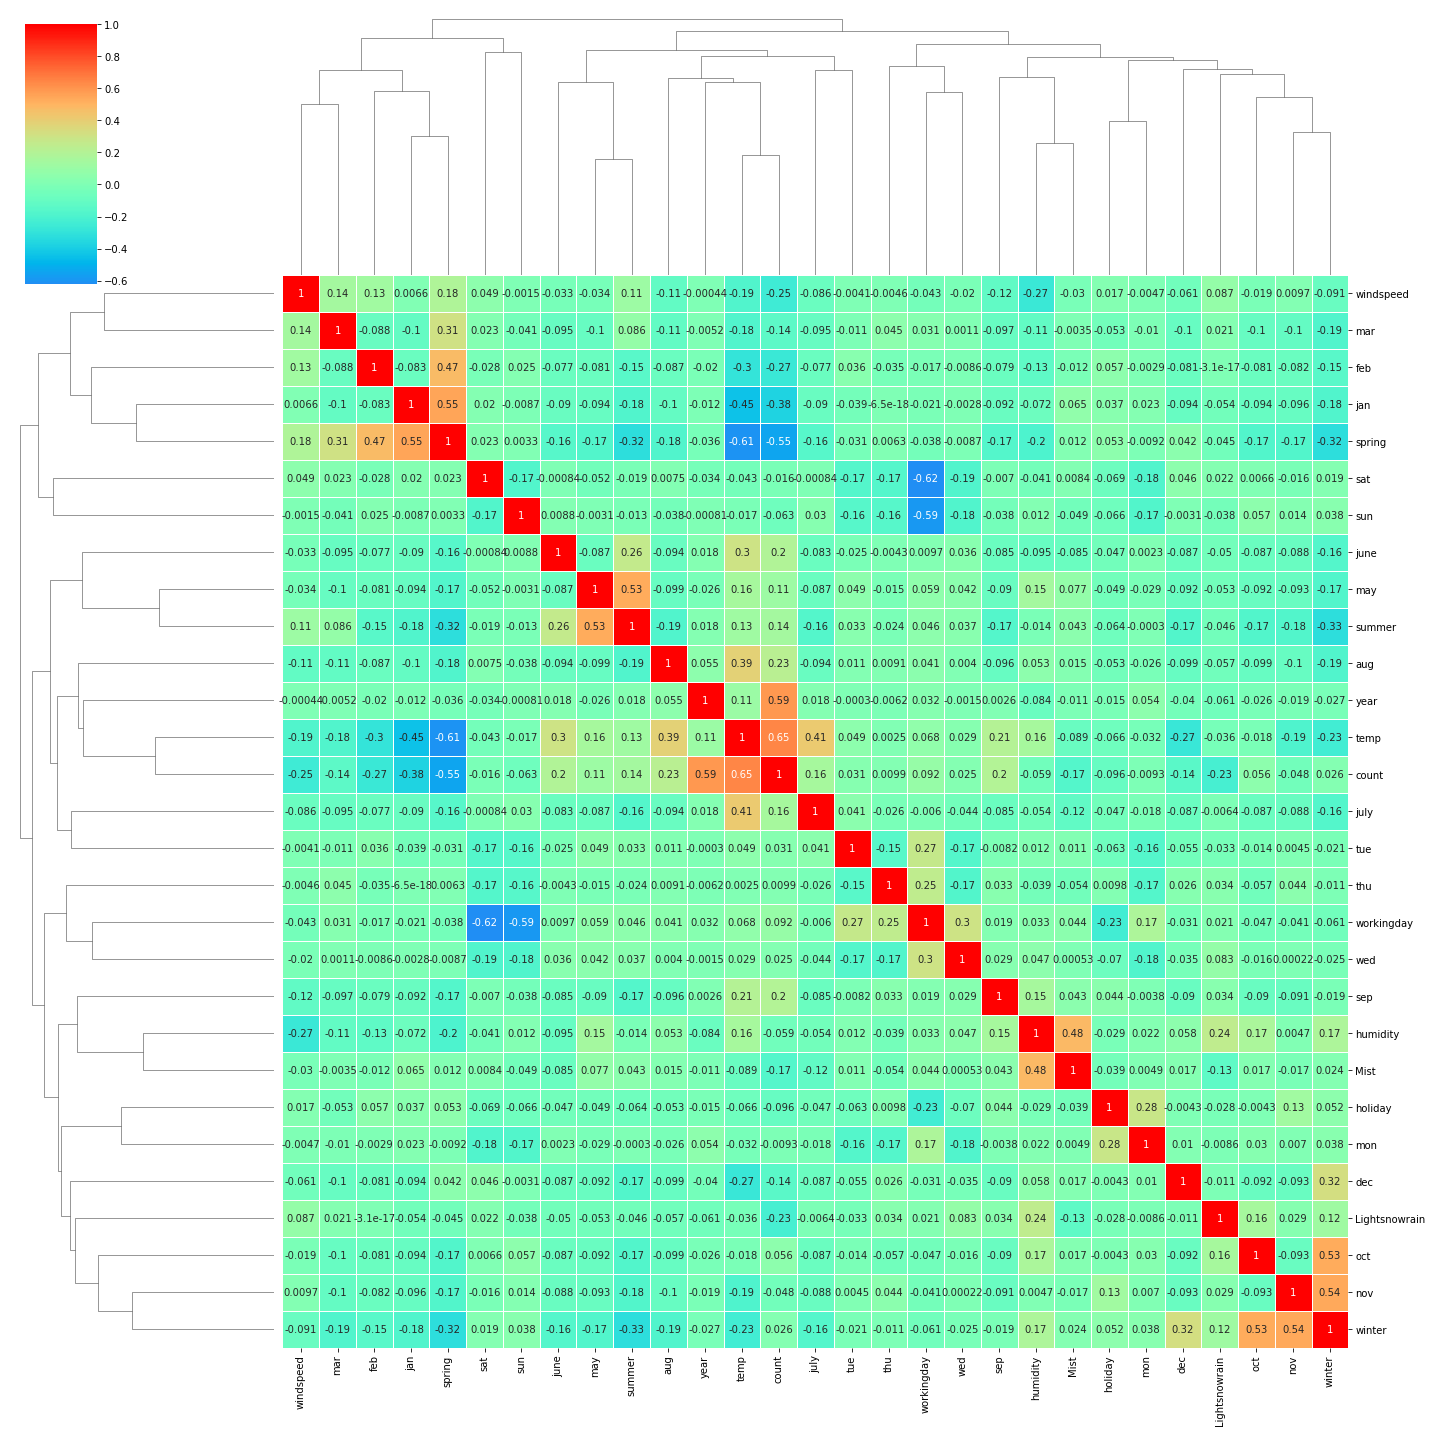

In [97]:
#Plotting Heatmap to see the correlation of all variables
kwargs = {'annot': True}

sns.clustermap(df_train.corr(), center = 0, cmap = 'rainbow', linewidths = 0.75, figsize = (20, 20), **kwargs)
plt.savefig('plotheatmap.png', dpi=300, bbox_inches='tight')
plt.show()

The count variable having Positive correlation with temp, year, August month And high negative correlation with Spring and Jan month

### 2.4 Featuring Variables

In [98]:
#Featuring x and y variable for training a model

#Fixing target variable Y, in model it is y_train
y_train = df_train.pop('count')
y_train.info()
#Fixing X variable with available numeric independent variable
x_train = df_train

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 576 to 520
Series name: count
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


### 2.5 Using Recursive Feature Elimination method to eliminate least independent predictor variable for target

In [99]:
#Creating object for linearregression model as lr
lr = LinearRegression()
lr.fit(x_train, y_train)
#Selecting top 15 independent variable for prediction
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [100]:
#Visualizing the selected columns
rfe_df = pd.DataFrame({'Predictor_variable': x_train.columns, 'Status': rfe.support_, 'Rank': rfe.ranking_})
rfe_df.sort_values(by='Rank')

,Predictor_variable,Status,Rank
0,year,True,1
25,spring,True,1
24,Mist,True,1
23,Lightsnowrain,True,1
18,sat,True,1
16,sep,True,1
26,summer,True,1
10,july,True,1
9,jan,True,1
27,winter,True,1


## 3. Training the model using Linear regression method

In [101]:
#The following is an generalized function for evaluating Variance Inflation Factor(VIF)
def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model Building - 1

In [102]:
#Taking out the filtered columns in a list, top 15 predictor for target variable
col = x_train.columns[rfe.support_]
#Filtering that column alone and storing in a variable x_train_rfe
x_train_rfe = x_train[col]
#Add the constant intercept value
x_train_sm = sm.add_constant(x_train_rfe)
#Building a model
lr1 = sm.OLS(y_train, x_train_sm)
lr1_model = lr1.fit()
#Visualizing a summary
lr1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          4.22e-191
Time:                        17:29:45   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
year              0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
humidity         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep               0.0814      0.016      4.945      0.000       0.049       0.114
sat               0.0536      0.014      3.694      0.000       0.025       0.082
Lightsnowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
#Lets check the VIF factor
calculate_VIF(x_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Mist,2.29
0,year,2.09
9,sat,1.98


Conclusion:
<br>P value is <0.05 and Propability of f(stats) is <0.05, R^2 is 84%.
<br> The VIF of humidity is very high, So deciding to drop and rebuild
    

In [104]:
#Dropping humidity since its having high VIF values
x_train_model2 = x_train_rfe.drop(['humidity'], axis = 1)

#Invoking function to calculate VIF for the new model
calculate_VIF(x_train_model2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


Conclusion:
<br>There is a good reduction in temperature VIF

### Model Re-Building - 2

In [105]:
#Add the constant intercept value
x_train_sm_model2 = sm.add_constant(x_train_model2)
#Building a model
lr2 = sm.OLS(y_train, x_train_sm_model2)
lr2_model = lr2.fit()
#Visualizing a summary
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.60e-188
Time:                        17:29:45   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
year              0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep               0.0755      0.017      4.527      0.000       0.043       0.108
sat               0.0583      0.015      3.968      0.000       0.029       0.087
Lightsnowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer            0.0445      0.015      2.967      0.003       0.015       0.074
winter            0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:
<br>Even after removing humidity there is no much difference occured on R^2 value. The prob(f-stats) reduced to a good amount.

In [106]:
#Dropping holiday since its having p value is 0.04
x_train_model3 = x_train_model2.drop(['holiday'], axis = 1)

#Invoking function to calculate VIF for the new model
calculate_VIF(x_train_model3)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
10,spring,2.99
11,summer,2.33
0,year,2.08
12,winter,1.91
7,sat,1.84
4,jan,1.62
5,july,1.59


### Model Re-Building - 3

In [107]:
#Add the constant intercept value
x_train_sm_model3 = sm.add_constant(x_train_model3)
#Building a model
lr3 = sm.OLS(y_train, x_train_sm_model3)
lr3_model = lr3.fit()
#Visualizing a summary
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          8.68e-189
Time:                        17:29:45   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1657      0.031      5.292      0.000       0.104       0.227
year              0.2346      0.008     28.941      0.000       0.219       0.251
workingday        0.0546      0.011      4.967      0.000       0.033       0.076
temp              0.4724      0.034     13.966      0.000       0.406       0.539
windspeed        -0.1572      0.025     -6.306      0.000      -0.206      -0.108
jan              -0.0398      0.018     -2.252      0.025      -0.074      -0.005
july             -0.0468      0.018     -2.549      0.011      -0.083      -0.011
sep               0.0736      0.017      4.406      0.000       0.041       0.106
sat               0.0667      0.014      4.710      0.000       0.039       0.094
Lightsnowrain    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
Mist             -0.0807      0.009     -9.351      0.000      -0.098      -0.064
spring           -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer            0.0448      0.015      2.980      0.003       0.015       0.074
winter            0.0775      0.017      4.499      0.000       0.044       0.111
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion:
<br>The R^2 and adjusted R^2 value same as previous model. But there is a significant increase in prob(f-stats) compared to model2

In [108]:
#Dropping January since its having p value 0.025
x_train_model4 = x_train_model3.drop(['jan'], axis = 1)

#Invoking function to calculate VIF for the new model
calculate_VIF(x_train_model4)

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
9,spring,2.38
10,summer,2.32
0,year,2.07
11,winter,1.91
6,sat,1.83
4,july,1.58
8,Mist,1.57


### Model Re-Building - 4

In [109]:
#Add the constant intercept value
x_train_sm_model4 = sm.add_constant(x_train_model4)
#Building a model
lr4 = sm.OLS(y_train, x_train_sm_model4)
lr4_model = lr4.fit()
#Visualizing a summary
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.12e-189
Time:                        17:29:45   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881      0.000       0.089       0.209
year              0.2339      0.008     28.756      0.000       0.218       0.250
workingday        0.0545      0.011      4.938      0.000       0.033       0.076
temp              0.4920      0.033     14.991      0.000       0.427       0.556
windspeed        -0.1499      0.025     -6.040      0.000      -0.199      -0.101
july             -0.0486      0.018     -2.637      0.009      -0.085      -0.012
sep               0.0740      0.017      4.414      0.000       0.041       0.107
sat               0.0664      0.014      4.671      0.000       0.038       0.094
Lightsnowrain    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Mist             -0.0817      0.009     -9.428      0.000      -0.099      -0.065
spring           -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer            0.0481      0.015      3.196      0.001       0.019       0.078
winter            0.0838      0.017      4.910      0.000       0.050       0.117
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conclusion : Some reduction occured on prob(f-stats) compared to previous model

In [110]:
#Dropping July since its having p value 0.009
x_train_model5 = x_train_model4.drop(['july'], axis = 1)

#Invoking function to calculate VIF for the new model
calculate_VIF(x_train_model5)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Mist,1.57
4,sep,1.23


#### Model Rebuilding - 5

In [111]:
#Add the constant intercept value
x_train_sm_model5 = sm.add_constant(x_train_model5)
#Building a model
lr5 = sm.OLS(y_train, x_train_sm_model5)
lr5_model = lr5.fit()
#Visualizing a summary
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.42e-188
Time:                        17:29:46   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1406      0.031      4.597      0.000       0.080       0.201
year              0.2344      0.008     28.655      0.000       0.218       0.250
workingday        0.0555      0.011      4.996      0.000       0.034       0.077
temp              0.4796      0.033     14.678      0.000       0.415       0.544
windspeed        -0.1500      0.025     -6.007      0.000      -0.199      -0.101
sep               0.0873      0.016      5.423      0.000       0.056       0.119
sat               0.0667      0.014      4.665      0.000       0.039       0.095
Lightsnowrain    -0.2893      0.025    -11.765      0.000      -0.338      -0.241
Mist             -0.0804      0.009     -9.241      0.000      -0.097      -0.063
spring           -0.0554      0.021     -2.692      0.007      -0.096      -0.015
summer            0.0626      0.014      4.447      0.000       0.035       0.090
winter            0.0958      0.017      5.788      0.000       0.063       0.128
==============================================================================
Omnibus:                       76.073   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.745
Skew:                          -0.765   Prob(JB):                     1.71e-41
Kurtosis:                       5.548   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
On a continuous dropping of columns for a build of better model.
<br>1) R^2 value is 83%.
<br>2) The P-value for spring alone 0.007 and the remaining all values are 0.
<br>3) The received prob(f-stats) is a lowest among other models with the value of 1.42e-188.However the value its similar to zero.
<br>4))The VIF of independent variable for all is <5 other than temp column which is a significant value

## 4.Residual Evaluation

### 4.1 Model Summary Analysis

#### Conclusion : 
1) R^2 value is 83%.
<br>2) The P-value for spring alone 0.007 and the remaining all values are 0.
<br>3) The received prob(f-stats) is a lowest among other models with the value of 1.42e-188.However the value its similar to zero.
<br>4))The VIF of independent variable for all is <5 other than temp column which is a significant value

In [112]:
#Fetching only a Y-predicted value for standard error deviation calculation
y_train_pred = lr5_model.predict(x_train_sm_model5)

### 4.2 Standard error term distribution

Text(0.5, 0, 'Errors Distribution')

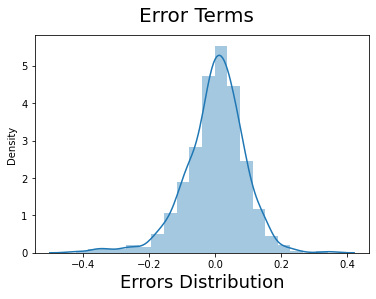

In [113]:
#Plotting error distribution
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors Distribution', fontsize = 18)

Conclusion :
<br>1) Error distribution is with mean equal to 0
<br>2) The shape of the plot shows normal distribution

### 4.3 Multicollinearity

In [114]:
#To check how independent variable having linear relationship with each other
calculate_VIF(x_train_model5)

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
8,spring,2.30
0,year,2.07
9,summer,2.00
5,sat,1.83
10,winter,1.76
7,Mist,1.57
4,sep,1.23


Conclusion : The VIF of independent variable are less than 5 which is significant.

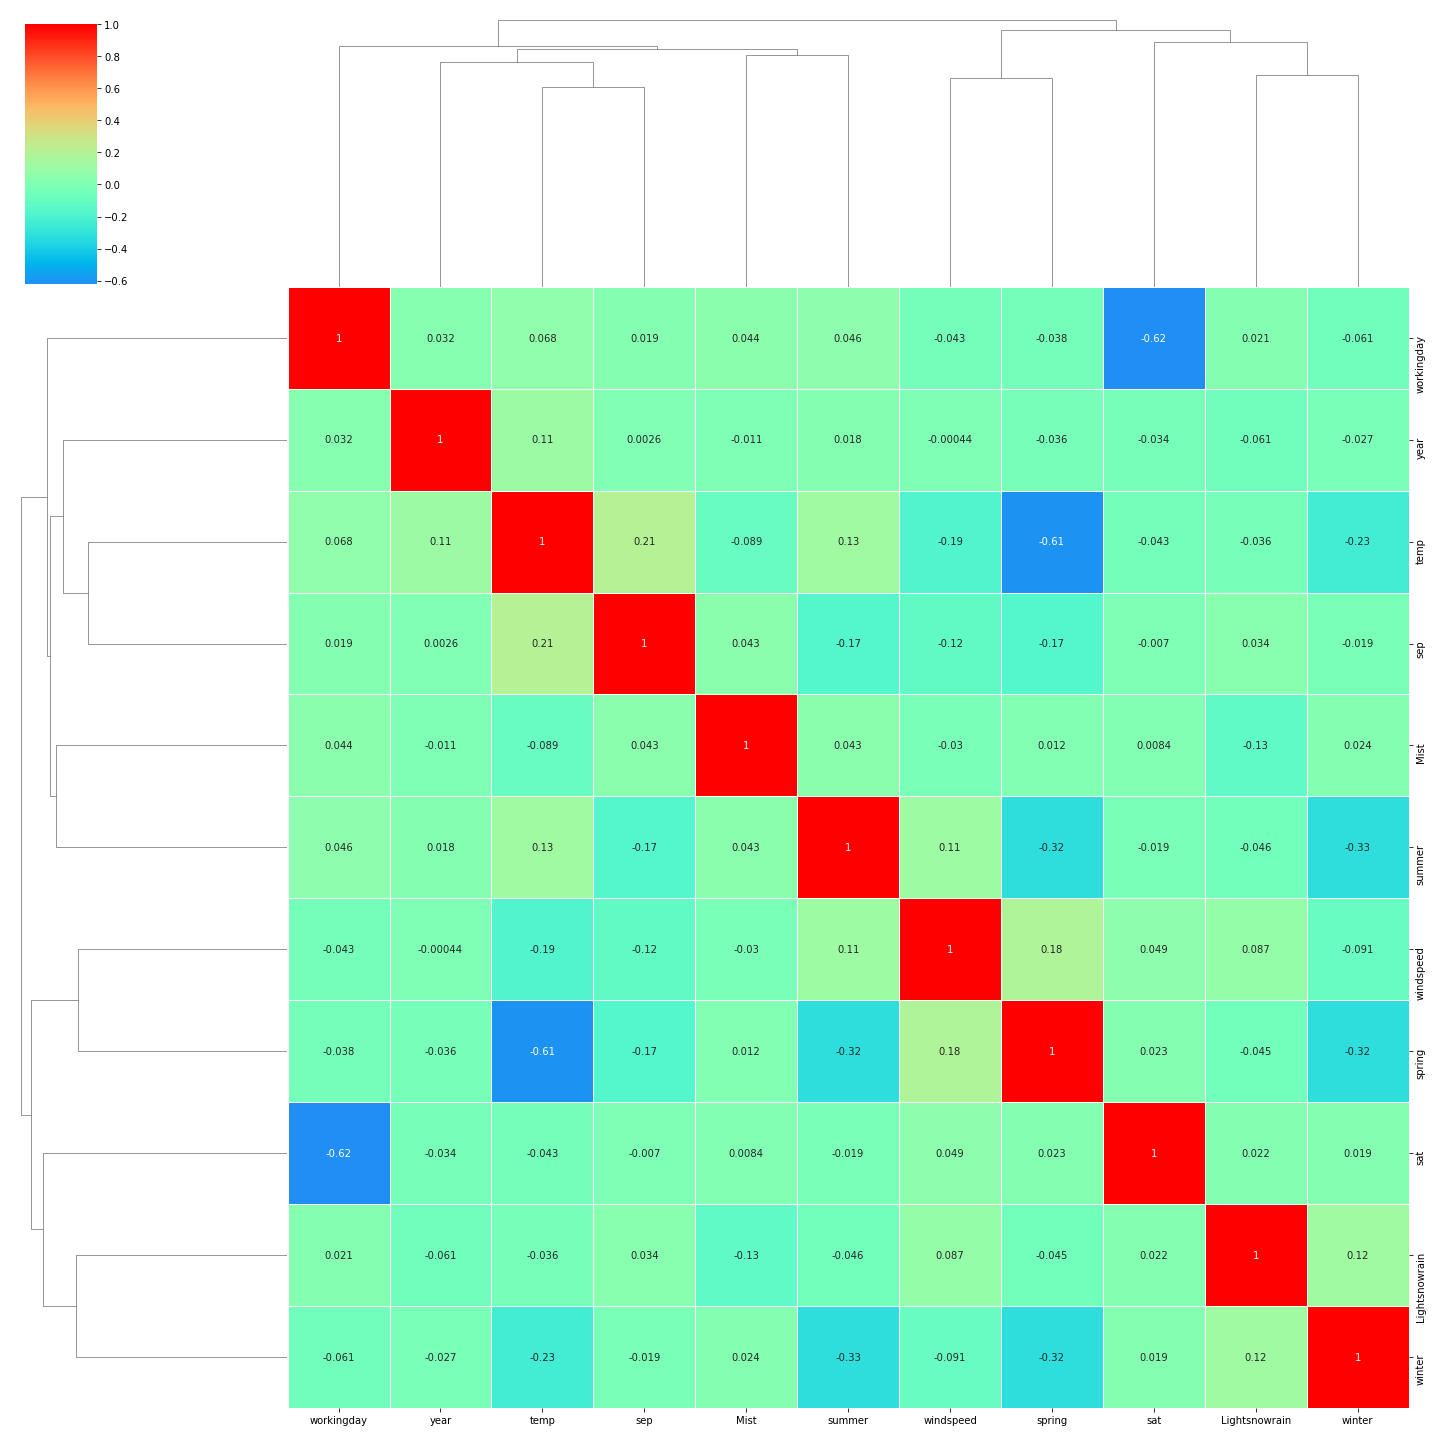

In [115]:
#Calculating correlation on used trained model set
df_1 = x_train_model5.corr()
#Plotting heat map
kwargs = {'annot': True}

sns.clustermap(df_1, center = 0, cmap = 'rainbow', linewidths = 0.75, figsize = (20, 20), **kwargs)
plt.savefig('plotheatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Above heat map is a illustration of multicollinearity

### 4.4 Homoscedasticity

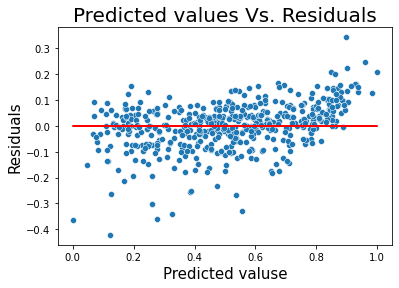

In [116]:
y_train_pred = lr5_model.predict(x_train_sm_model5)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.title('Predicted values Vs. Residuals', fontdict={'fontsize': 20})
plt.xlabel('Predicted valuse', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

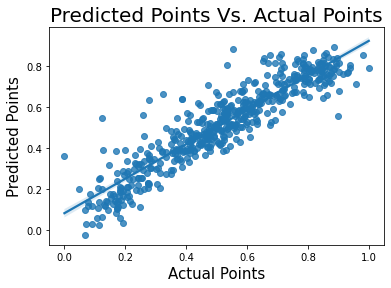

In [117]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

Conclusion : Since the plot shows Homoscedasticity in nature, the error terms having constant variance, the model is significant

## 5. Prediction and Evaulation on a Test set

### 5.1 Data Preparation on Test set

In [118]:
#Visualizing Test set
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,aug,dec,feb,...,sat,sun,thu,tue,wed,Lightsnowrain,Mist,spring,summer,winter
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,30.5000,19.583229,4968,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### 5.1.2 Rescaling on Test set

In [119]:
#Scaling columns in test data set
df_test[range_variables] = scaler.transform(df_test[range_variables])

### 5.1.3 Featuring X and Y variable

In [120]:
#Featuring Y
y_test = df_test.pop('count')
#Featuring X
x_test = df_test

In [121]:
#Selecting the column involved in training a model
columns = x_train_model5.columns
x_test = x_test[columns]

# Adding constant variable to test dataframe
x_test_lr_model = sm.add_constant(x_test)

In [122]:
#Predicting the target variable with test set
y_pred = lr5_model.predict(x_test_lr_model)

### 5.1.4 Calculating r^2 value

In [123]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8063

In [124]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7961


### 5.1.5 Visualizing Predicted target variable on test set Vs actual value on test test

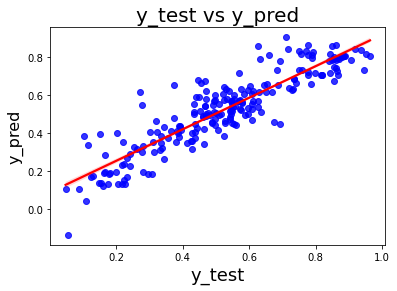

In [125]:
# plotting a Regression plot
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Final Report

### On Training Set
1) R^2 Values - 0.838
<br>2) Adjusted R^2 Values - 0.834 
<br>3) Prob(F-stats) Values - 1.42e-188

### On Test Set
1) R^2 Values - 0.8063
<br>2) Adjusted R^2 Values - 0.7961

### Equation of Fit line

In [126]:
round(lr5_model.params,3)

const            0.141
year             0.234
workingday       0.055
temp             0.480
windspeed       -0.150
sep              0.087
sat              0.067
Lightsnowrain   -0.289
Mist            -0.080
spring          -0.055
summer           0.063
winter           0.096
dtype: float64

#### These are the columns involved in prediction of Bike demand:
year,workingday,temp,windspeed,sep,sat,Lightsnowrain,Mist,spring,summer,winter 

#### Equation of line:
y_pred = 0.141 + 0.234 * year + 0.055 * workingday + 0.480 * temp - 0.150 * windspeed + 0.087 * sep + 0.067 * sat - 0.289 * Lightsnowrain - 0.080 * Mist - 0.055 * spring + 0.063 * summer + 0.096 * winter 

## Conclusion 
The linear regression builded model is predicting output with 80% correctness.